<a href="https://colab.research.google.com/github/nick21aka/ML.API/blob/main/Informe_Tecnico_FMY0100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

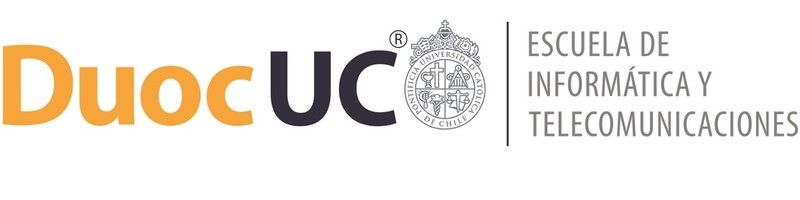

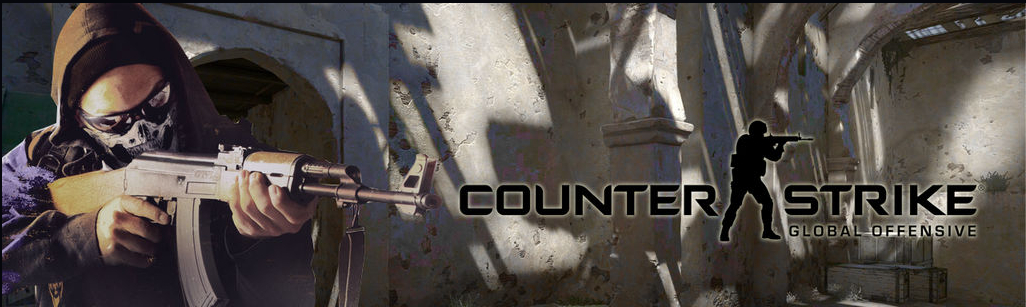

# Informe Técnico - Examen Transversal: Caso Counter Strike


Integrantes:
Nicolas Silva
Renato Vera

Docente:  Giocrisrai Godoy   

Sección: MLY0100 -

# Caso Fundamentos de Machine Learning

CONTEXTO CASO

Valve, nos ha contactado como equipo de análisis de datos y modelado de Machine Learning para analizar y realizar modelos predictivos sobre los datos.

En cada partida de Counter Strike: GO dos equipos de 5 jugadores (denominados terroristas y contra-terroristas) se enfrentan.


El objetivo del equipo terrorista es plantar una bomba con timer de 45 segundos en uno de dos sitios específicos dentro de un mapa. Por otro lado, el objetivo del equipo contra-terrorista es evitar que la bomba sea plantada o desactivarla antes de que esta explote cuando ya ha sido plantada. Los datos a utilizar corresponden a sobre 7000 partidas del juego (con un máximo de 10 jugadores c/u)  


Los datos han sido extraídos de replays, los cuales son archivos propietarios con la información de cada una de las acciones realizadas por cada jugador dentro de una partida. Los replays han sido extraídos de la red utilizando un scrapper y pre-procesados utilizando un script.  



En este caso, la data corresponde a un archivo CSV con 79.157 filas, cada una correspondiente a un jugador dentro de una partida. El archivo contiene 29 columnas correspondientes a variables que describen las acciones del jugador dentro del juego.


$$
\begin{aligned}
&\begin{array}{cccc}
\hline \hline \text { Dato } & \text { Descripción } \\
\hline Map & \text {Nombre  del Mapa donde se jugó la partida}  \\
\hline \text{ Team} & \text { Nombre de equipo al que pertenece el jugador} \\
\hline \text{ InternalTeamId} & \text { Identificador del equipo al que pertenece el jugador.} \\
\hline \text{ MatchId} & \text { Identificador de la partida.} \\
\hline \text{ RoundId} & \text { Identificador de la ronda (los equipos se enfrentan en rondas de 5 partidas seguidas)} \\
\hline \text{ MatchWinner} & \text { Indica si el jugador ganó o no la partida.} \\
\hline \text{ RoundWinner} & \text { Indica si el jugador ganó o no la ronda analizada.} \\
\hline \text{ Survived} & \text { Indica si el jugador sobrevivió o no a la partida (sobrevivir no es sinónimo de ganar).} \\
\hline \text{ AbnormalMatch} & \text { Indica si la partida del jugador tuvo un error por conexión de red} \\
\hline \text{ TimeAlive} & \text { Indica el tiempo en segundos que el jugador estuvo vivo durante el juego} \\
\hline \text{ TravelledDistance} & \text { Distancia viajada por el jugador durante la partida.} \\
\hline \text{ RLethalGrenadesThrown/RNonLethalGrenadesThrown} & \text { Cantidad de granadas lanzadas, categorizadas en letales y no-letales.} \\
\hline \text{ PrimaryXXXX} & \text { Porcentaje de uso arma clasificada como primaria. Categorizada en AssaultRifle, SniperRifle, SMG, Heavy y Pistol.} \\
\hline \text{ [Match|Round] Assists} & \text { Cantidad de asistencias efectuadas por el jugador durante la partida o la ronda.} \\
\hline \text{ [Match|Round] Kills} & \text { Cantidad de kills efectuados por el jugador durante la partida o la ronda.} \\
\hline \text{ [Match|Round] FlankKills} & \text { Cantidad de kills efectuados por el jugador sin que la víctima lo viese durante la partida o la ronda.} \\
\hline \text{ [Match|Round] HeadShots} & \text { Cantidad de kills efectuados por el jugador a través de un tiro en la cabeza durante la partida o la ronda.} \\
\hline \text{ RoundStartingEquipmentValue} & \text { Valor del equipamiento llevado por el jugador al inicio de la ronda.} \\
\hline \text{ TeamStartingEquipmentValue} & \text { Valor promedio del equipamiento llevado por el equipo del jugador al inicio de la ronda.} \\
\end{array}
\end{aligned}
$$

## Fase 1: Business Understanding

In [ ]:
# Insertar cuantos bloques de código consideren necesarios
# Se recomienda obtener estadísticos descriptivos para apoyar hipótesis inferenciales.
# Reconocer la naturaleza de los datos y como tratarlos en etapas posteriores y dar ideas de como se podría transformar.
# Identificar MissingValues, outliers, medidas de posición, medidas de dispersión etc.


#instertar las librerias a nuestro entorno de trabajo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# preprocesado y modelado
# =============================================================================================================================
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error




Cantidad de registros: 79,157 filas.

Cantidad de columnas: 30 columnas.

Variables:
Objetos (texto): Map, Team, RoundWinner, MatchWinner, TimeAlive, TravelledDistance, FirstKillTime.

Numéricas:

Enteros: muchos contadores como MatchKills, RoundKills, RLethalGrenadesThrown.

Booleanas: Survived, AbnormalMatch.

Algunos problemas: TimeAlive y TravelledDistance son tipo object cuando deberían ser números.



La industria de los videojuegos competitivos, Counter-Strike, genera una enorme cantidad de datos en cada partida: muertes, asistencias, compras de equipo, desplazamientos en el mapa, tiempos de supervivencia, entre otros.
Analizar estos datos es esencial para entender patrones de juego, optimizar estrategias de equipo, balancear el juego o incluso desarrollar sistemas automáticos de predicción de resultados.

El dataset entregado contiene información sobre eventos de rondas de partidas jugadas, permitiendo observar múltiples variables que influyen en el desempeño de los equipos y jugadores.

Queremos analizar datos de rondas de partidas FPS para construir modelos de predicción de desempeño de los jugadores, utilizando técnicas de machine learning (clasificación y regresión), luego de realizar transformaciones necesarias a los datos.
nuestra hipotesis es que arma es usada para hacer mas kills en la cantidad total de rondas








Objetivo de regresión: Predecir cuántas kills hará un jugador por kit de arma especifica.

objetivo de clasificacion: (roundkills) predecir si el jugador hace una buena ronda o no dependiendo de la cantidad de kills que haga.
Distribución de BuenaRonda:
BuenaRonda
0    75652 jugadores tuvieron menos de 2 kills por ronda.
1     3505 jugadores tuvieron mas de 2 kills por ronda.

## Fase 2: Data Understanding

In [ ]:
# Insertar cuantos bloques de código consideren necesarios
# Se recomienda obtener estadísticos descriptivos para apoyar hipótesis inferenciales.
# Reconocer la naturaleza de los datos y como tratarlos en etapas posteriores y dar ideas de como se podría transformar.
# Identificar MissingValues, outliers, medidas de posición, medidas de dispersión etc.

#instertar las librerias a nuestro entorno de trabajo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# preprocesado y modelado
# =============================================================================================================================
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


In [ ]:
#cargar archivo base de datos del drive
pd.read_csv('/content/ET_demo_round_traces_2022.csv', sep=';')
df = pd.read_csv('/content/ET_demo_round_traces_2022.csv', sep=';')
df.head()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# 2. Identificar una columna con valores nulos
columnas_con_nulos = df.columns[df.isnull().any()]
print("Columnas con valores nulos:", columnas_con_nulos.tolist())



In [ ]:
#conociendo los tipos de datos
#total de atributos encontrados en la fuente de datos
num_columnas = len(df.columns)
print("Número total de atributos en la fuente de datos es de:", num_columnas)
print("---------------------------------------------------------------------------------------------------------------------------")
#total de atributos categoricos
categorica = df.select_dtypes(include=['object']).columns.tolist()
num_categoricas = len(categorica)
print("Número total de atributos categoricos en la fuente de datos es de:", num_categoricas)
print("los nombres de los atributos categoricos son:", categorica)
print("---------------------------------------------------------------------------------------------------------------------------")
#total atributos numericos
num_cols = df.select_dtypes(include=['number']).columns.tolist()
num_numericas = len(num_cols)
print("Número total de atributos numericos en la fuente de datos es de:", num_numericas)
print("los nombres de los atributos numericos son:", num_cols)
print("---------------------------------------------------------------------------------------------------------------------------")
total_registros = df.shape[0]
print("El total de registros en la fuente de datos es de:", total_registros)


In [ ]:
#se describen el tipo de datos y su null
df.info()

In [ ]:
#se obtiene el resumen estadistico de las tablas
df.describe()

In [ ]:
#identificamos las medias de posicion al calcular la mediana, moda, desviacion estandar
#media aritmetica, la varianza y datos unicos

numeric_df = df.select_dtypes(include=['number'])

print('mediana:', numeric_df.median())
print('---------------------------------------------------------------------------------------------------------------------------')
print('moda:', numeric_df.mode())
print('---------------------------------------------------------------------------------------------------------------------------')
print('desviacion estandar:', numeric_df.std())
print('---------------------------------------------------------------------------------------------------------------------------')
#media aritmetica x fila
numeric_df.mean(axis=1).head()
print('---------------------------------------------------------------------------------------------------------------------------')
print('varianza:', numeric_df.var())
print('---------------------------------------------------------------------------------------------------------------------------')
#datos unicos
for columna in df.columns:
  print('\nEstadistica de la columna {0}'.format(columna))
  print(df[columna].value_counts())
  print(df[columna].unique())

In [ ]:
import pandas as pd
#Crear objetivo de Clasificación: "BuenaRonda"
#Si hizo más de 2 kills en la ronda, es una buena ronda (1), si no (0)
df['BuenaRonda'] = df['RoundKills'].apply(lambda x: 1 if x > 2 else 0)


#Guardar el nuevo dataset
df.to_csv('ET_demo_round_traces_with_targets.csv', index=False)

print("Archivo guardado como 'ET_demo_round_traces_with_targets.csv' con los nuevos objetivos.")


In [ ]:
# Análisis de BuenaRonda
BuenaRonda_counts = df['BuenaRonda'].value_counts()
BuenaRonda_percentage = df['BuenaRonda'].value_counts(normalize=True) * 100

print("Distribución de BuenaRonda:")
print(BuenaRonda_counts)
print("\nPorcentaje de BuenaRonda:")
print(BuenaRonda_percentage)


Cuántas rondas fueron "buenas" (1) y cuántas "no buenas" (0).

El porcentaje de cada categoría.

In [ ]:
# calcular la correlacion de solo las variables numericas.
correlacion = df.select_dtypes(include=['number']).corr()
print(correlacion)


In [ ]:
plt.figure(figsize=(12, 12))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()


PrimaryPistol con PrimaryAssaultRifle = -0.78
Fuerte correlación negativa: si se usa una, no se usa la otra (son armas principales excluyentes).




In [ ]:
filtered_df = df.select_dtypes(include=['number'])
filtered_df = df[['RoundKills','PrimaryPistol', 'PrimaryAssaultRifle', 'PrimarySniperRifle', 'PrimarySMG', 'PrimaryHeavy', 'PrimaryPistol']]
#calcular que arma se utiliza mas por roundkills



In [ ]:
# Filtrar solo las columnas relevantes
filtered_df = df[['RoundKills', 'PrimaryPistol', 'PrimaryAssaultRifle', 'PrimarySniperRifle', 'PrimarySMG', 'PrimaryHeavy']]

# Sumar los RoundKills por tipo de arma
# Para eso, multiplicamos RoundKills por cada tipo de arma (suponiendo que cada columna de arma indica si fue usada o no, 0 o 1)
arma_kills = {}

for arma in ['PrimaryPistol', 'PrimaryAssaultRifle', 'PrimarySniperRifle', 'PrimarySMG', 'PrimaryHeavy']:
    arma_kills[arma] = (filtered_df['RoundKills'] * filtered_df[arma]).sum()

# Convertir a DataFrame para verlo ordenado
arma_kills_df = pd.DataFrame.from_dict(arma_kills, orient='index', columns=['TotalKills'])
arma_kills_df = arma_kills_df.sort_values(by='TotalKills', ascending=False)

# Mostrar el arma más usada
arma_mas_usada = arma_kills_df.idxmax()

print("Arma más utilizada basada en RoundKills:")
print(arma_mas_usada)
print(arma_kills_df)




In [ ]:
#3. **¿Ciertos tipos de armas primarias favorecen la mayoria de kills por ronda?**
#- Variable objetivo: `RoundKills`
#- Predictoras: `PrimaryRifle`, `PrimarySMG`, `Kills`, `HeadShots`


import matplotlib.pyplot as plt
import seaborn as sns

# Crear el bar plot
plt.figure(figsize=(10,6))
sns.barplot(x=arma_kills_df.index, y=arma_kills_df['TotalKills'], palette='Blues_d')

# Estética del gráfico
plt.title('Kills por tipo de arma', fontsize=16)
plt.xlabel('Tipo de Arma', fontsize=14)
plt.ylabel('Total de Kills', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


In [ ]:
df.columns

In [ ]:
X = df[['PrimaryAssaultRifle', 'PrimarySniperRifle', 'PrimaryHeavy', 'PrimarySMG', 'PrimaryPistol', 'Team', 'Map']]
y = df['RoundKills']

X = pd.get_dummies(X)  # Convertir categóricas a numéricas



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = RandomForestRegressor()
model.fit(X_train, y_train)


In [ ]:
y_pred = model.predict(X_test)


In [ ]:
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio:", mse)


## Fase 3: Data Preparation

In [ ]:
df2 = df.copy()
df2



In [ ]:
#transformacion de datos
df2.Map.replace({"de_inferno":1,"de_mirage":2,"de_nuke":3,"de_dust2":4}, inplace=True)
df2.Team.replace({"CounterTerrorist":0,"Terrorist":1}, inplace=True)
df2.head()


In [ ]:


# Imprimir los nombres de las columnas categóricas
print("Columnas categóricas para transformar a enteros:")
print(categorica)

# Mostrar el DataFrame después de la transformación (ya realizada en el código anterior)
print("\nDataFrame después de la transformación:")
print(df2.head())


In [ ]:
# transformacion de datos
df2.Map.replace({"de_inferno":1,"de_mirage":2,"de_nuke":3,"de_dust2":4}, inplace=True)
df2.Team.replace({"CounterTerrorist":0,"Terrorist":1}, inplace=True)



In [ ]:
import pandas as pd

# transformacion de datos
df2.Map.replace({"de_inferno":1,"de_mirage":2,"de_nuke":3,"de_dust2":4}, inplace=True)
df2.Team.replace({"CounterTerrorist":0,"Terrorist":1}, inplace=True)


df2['RoundWinner'].replace({'False4': 0, 'True4': 1, 'False': 0, 'True': 1}, inplace=True) # Add other problematic values found

df2['RoundWinner'] = df2['RoundWinner'].fillna(0).astype(int)

df2['TimeAlive'] = pd.to_numeric(df2['TimeAlive'], errors='coerce')

df2['TimeAlive'] = df2['TimeAlive'].fillna(0.0)

df2['TravelledDistance'] = pd.to_numeric(df2['TravelledDistance'], errors='coerce')

df2['TravelledDistance'] = df2['TravelledDistance'].fillna(0.0)

df2['MatchWinner'] = df2['MatchWinner'].fillna(0).astype(int)

df2['FirstKillTime'] = pd.to_numeric(df2['FirstKillTime'], errors='coerce')
df2['FirstKillTime'] = df2['FirstKillTime'].fillna(0.0)


df2.info()

In [ ]:
df2['RoundWinner'] = df2['RoundWinner'].astype(int)
df2['MatchWinner'] = df2['MatchWinner'].astype(int)
df2['TimeAlive'] = df2['TimeAlive'].astype(float)
df2['TravelledDistance'] = df2['TravelledDistance'].astype(float)
df2['FirstKillTime'] = df2['FirstKillTime'].astype(float)
df2.info()

In [ ]:
# Convertir a float y luego a int (esto redondea hacia abajo)
df2['TimeAlive_int'] = df2['TimeAlive'].astype(float).astype(int)


In [ ]:
df2['TimeAlive_int'] = df2['TimeAlive'].astype(float).round().astype(int)


In [ ]:
df1 = df2 ['TimeAlive_int']
df1

In [ ]:
# Insertar cuantos bloques de código consideren necesarios
# Se recomienda considerar todas las transformaciones necesarias para obtener la data lo más limpia posible.
# Realizar tratamiento a todos los datos que consideren necesarios.
import matplotlib.pyplot as plt
#crear una copia de data_frame para la limpieza

#seleccionar las variables numericas
variables_numericas = ['Map', 'RoundWinner', 'Survived',
                       'TimeAlive', 'PrimaryPistol', 'PrimaryAssaultRifle', 'PrimarySniperRifle', 'FirstKillTime', 'RoundKills',
                       'RoundAssists', 'RoundHeadshots', 'RoundStartingEquipmentValue', 'BuenaRonda']



#eliminar las variables no deseadas del dataframe
data_frame_filtrado = df2.drop(['Team', 'MatchWinner'], axis=1)

#generar histogramas para las variables restantes
data_frame_filtrado[variables_numericas].hist(figsize=(19, 20))
plt.tight_layout()
plt.show()

GRAFICOS EN DONDE SE MUESTRAN LAS ID DE FORMA INDEPENDIENTE Y LOS RESULTADOS DE LOS MOVIMIENTOS DE  CADA JUGADOR
RLehalGrenadesThrown indica	Cuántas granadas letales lanzó un jugador en una ronda. Casi siempre entre 0 y 2 granadas.
PrimaryAssaultRifle Indica si el arma principal era un rifle de asalto, Muchos jugadores sí usan rifles.
RoundKills	indica Cuántas kills consiguió un jugador en una ronda. La mayoría consigue 0-1 kills por ronda.

In [ ]:
correlacion1= df2.select_dtypes(include=['number']).corr()
print(correlacion)

In [ ]:
df2.info()

In [ ]:
df1 = df2 ['TimeAlive']
df1

In [ ]:
plt.figure(figsize=(15, 19))
sns.heatmap(correlacion1, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()


correlacion mas limpia del df2

In [ ]:
df2

In [ ]:
df2['MatchWinner'] = df2['MatchWinner'].astype(int)
df2['RoundWinner'] = df2['RoundWinner'].astype(int)

In [ ]:
#filtrado para tener un mejor modelo donde se agruparan y cambiaran los nombres de la variables para
#una mejor interpretacion



filtrado = df2.groupby(['MatchId', 'Team', 'Map']).size().reset_index(name='count')
print(filtrado.head())
filtrado['GanarPartida'] = df2.groupby(['MatchId','Team','Map'])['MatchWinner'].first().values
#--------------------------------------------------------------------------------------------------------------------------------------
filtrado['TotaldeRondas'] = df2.groupby(['MatchId','Team','Map'])['RoundId'].nunique().values
#--------------------------------------------------------------------------------------------------------------------------------------
filtrado['KillsporRonda'] = df2.groupby(['MatchId','Team','Map'])['RoundKills'].sum().values
#--------------------------------------------------------------------------------------------------------------------------------------
filtrado['AssistenciaporRonda'] = df2.groupby(['MatchId','Team','Map'])['RoundAssists'].sum().values
#--------------------------------------------------------------------------------------------------------------------------------------
filtrado['ValorEquipamientoEquipo'] = df2.groupby(['MatchId','Team','Map'])['TeamStartingEquipmentValue'].first().values
#--------------------------------------------------------------------------------------------------------------------------------------
filtrado['TotalGranadasLanzadas'] = df2.groupby(['MatchId','Team','Map'])['RLethalGrenadesThrown'].sum().values
#--------------------------------------------------------------------------------------------------------------------------------------
filtrado['TotalGranadasNoLanzadas'] = df2.groupby(['MatchId','Team','Map'])['RNonLethalGrenadesThrown'].sum().values
#--------------------------------------------------------------------------------------------------------------------------------------
filtrado['TotalDeGranadas'] = filtrado['TotalGranadasLanzadas'] + filtrado['TotalGranadasNoLanzadas']


filtrado


In [ ]:
filtrado = filtrado[['MatchId','Team','GanarPartida','KillsporRonda',
                           'ValorEquipamientoEquipo','TotalDeGranadas', 'TotaldeRondas']]

filtrado

In [ ]:
filtrado.info()

In [ ]:
missing_values = filtrado.isna().sum()
print("Valores faltantes por columna:")
print(missing_values)

In [ ]:
for columna in filtrado.columns:
  print('\nEstadistica de la columna {0}'.format(columna))
  print(filtrado[columna].describe())

In [ ]:


# Calcular la matriz de correlación para el DataFrame 'filtrado'
correlacion_filtrado = filtrado.select_dtypes(include=['number']).corr()

# Imprimir la matriz de correlación
print("\nMatriz de Correlación del DataFrame Filtrado:")
print(correlacion_filtrado)

# Crear el gráfico de calor de la matriz de correlación del DataFrame 'filtrado'
plt.figure(figsize=(10, 8))
sns.heatmap(correlacion_filtrado, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación (DataFrame Filtrado)", fontsize=16)
plt.show()


# FASE 4 MODELING


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#CREACION MODELO REGRESION MULTIPLE

In [ ]:
X = filtrado[['TotaldeRondas', 'TotalDeGranadas']]  # Variables independientes
y = filtrado['KillsporRonda']                      # Variable dependiente


In [ ]:
X_train, X_test, y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)


LinearRegression()

In [ ]:
Y_pred = modelo.predict(X_test)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


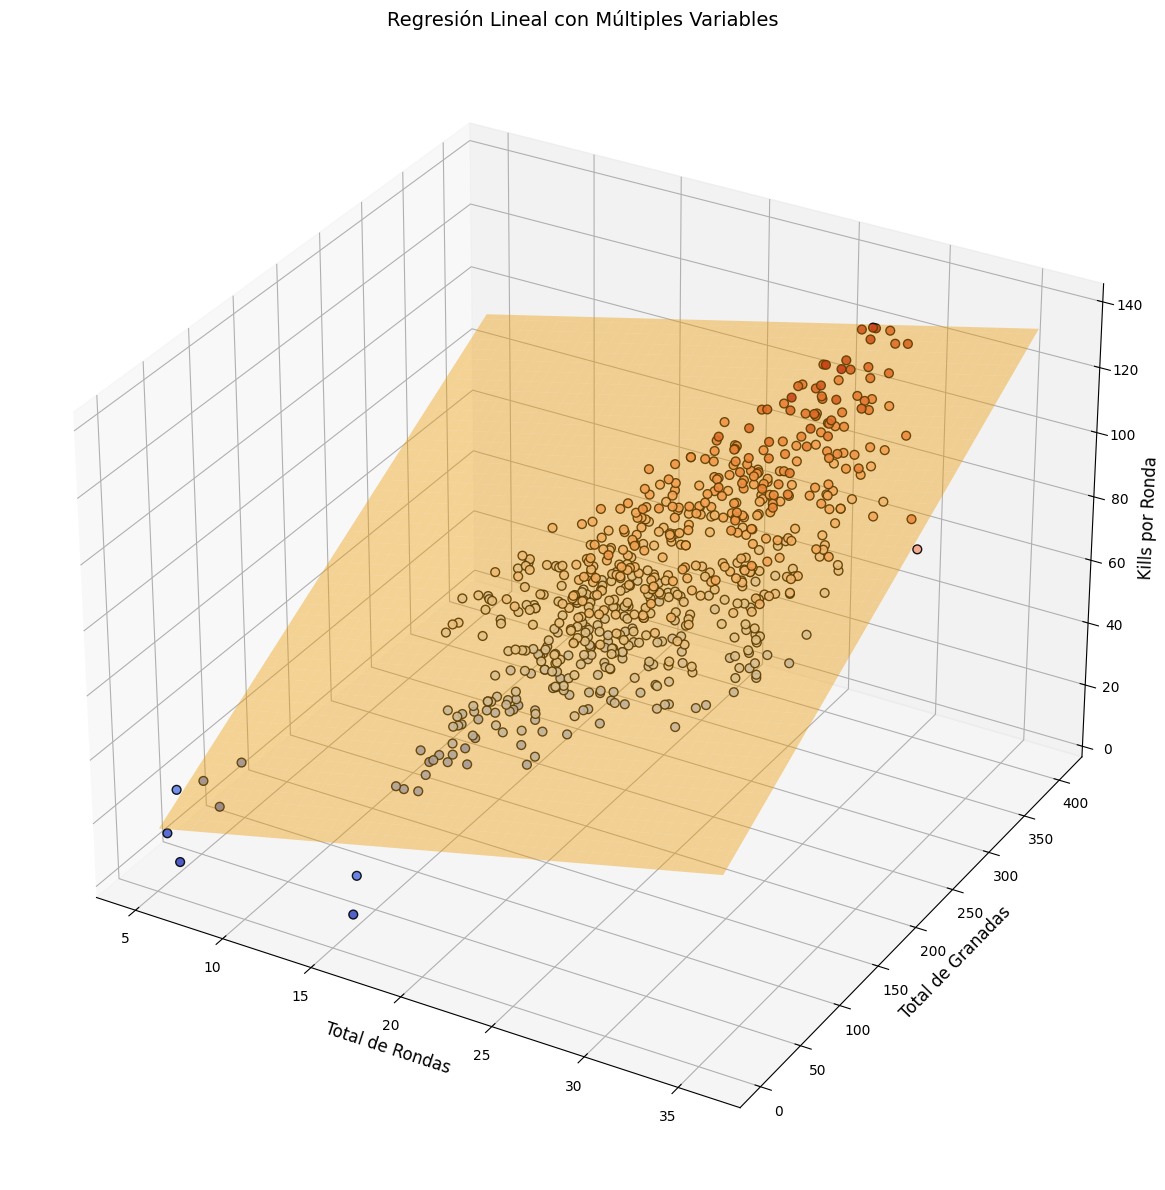

In [ ]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

# Puntos reales
scatter = ax.scatter(
    X['TotaldeRondas'], X['TotalDeGranadas'], y,
    c=y, cmap='coolwarm', s=40, edgecolor='k', alpha=0.9
)

# Plano del modelo
x_surf, y_surf = np.meshgrid(
    np.linspace(X['TotaldeRondas'].min(), X['TotaldeRondas'].max(), 100),
    np.linspace(X['TotalDeGranadas'].min(), X['TotalDeGranadas'].max(), 100)
)
z_surf = modelo.predict(np.array([x_surf.ravel(), y_surf.ravel()]).T).reshape(x_surf.shape)
ax.plot_surface(x_surf, y_surf, z_surf, color='orange', alpha=0.4)

# Etiquetas
ax.set_xlabel('Total de Rondas', fontsize=12)
ax.set_ylabel('Total de Granadas', fontsize=12)
ax.set_zlabel('Kills por Ronda', fontsize=12)
ax.set_title('Regresión Lineal con Múltiples Variables', fontsize=14)

plt.tight_layout()
plt.show()


In [ ]:
#modelo para predecir la cantidad de kills por ronda (KillsporRonda) en función del total de
#rondas jugadas y el total de granadas lanzadas/no lanzadas.
# Azul → Valores más bajos de KillsporRonda
# Rojo → Valores más altos de KillsporRonda

In [ ]:
#REGRESION  La cantidad de kills por ronda (RoundKills) que tendrá
#un jugador basada en sus estadísticas de desempeño, equipamiento
x = filtrado.drop(['KillsporRonda'], axis=1)
x.head()

,MatchId,Team,GanarPartida,ValorEquipamientoEquipo,TotalDeGranadas,TotaldeRondas
0,4,0.0,0,3750,244,23
1,4,1.0,1,4400,164,23
2,6,0.0,0,25400,4,16
3,6,1.0,1,9000,9,16
4,9,0.0,1,4100,266,25


In [ ]:
y = filtrado['KillsporRonda']
y.head()

,KillsporRonda
0,100
1,50
2,8
3,19
4,101


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
print('Forma de x_train:', x_train.shape)
print('Forma de x_test:', x_test.shape)
print('Forma de y_train:', y_train.shape)
print('Forma de y_test:', y_test.shape)

Forma de x_train: (532, 6)
Forma de x_test: (134, 6)
Forma de y_train: (532,)
Forma de y_test: (134,)


In [ ]:
y_pred = model.predict(x_train)

In [ ]:
print("R squared of the linear regression on training set: {:.2%}".format(model.score(x_train, y_train)))
print("R squared of the linear regression on test set: {:.2%}".format(model.score(x_test, y_test)))

R squared of the linear regression on training set: 70.80%
R squared of the linear regression on test set: 78.48%


<Axes: xlabel='KillsporRonda'>

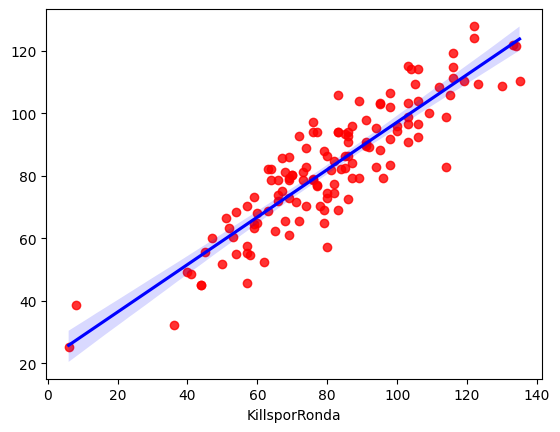

In [ ]:
y_pred = model.predict(x_test)
sns.regplot(x=y_test, y=y_pred, color='red', line_kws={"color": "blue"})


In [ ]:
#otro modelo un arbol de decision para regresion
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(random_state=42)
tree.fit(x_train, y_train)



DecisionTreeRegressor(random_state=42)

<Axes: xlabel='KillsporRonda'>

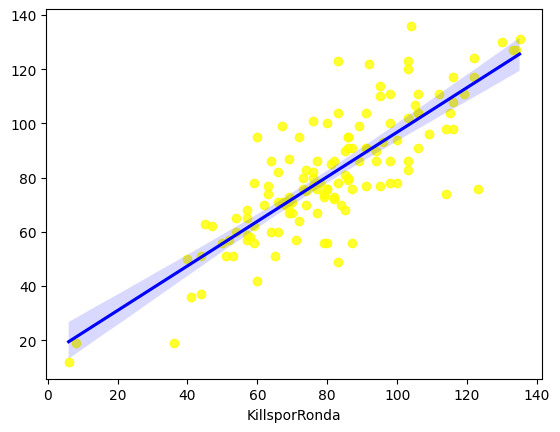

In [ ]:
y_pred1 = tree.predict(x_test)
sns.regplot(x=y_test, y=y_pred1, color='yellow', line_kws={"color": "blue"})

In [ ]:
print("R squared of the decision tree regressor on training set: {:.2%}".format(tree.score(x_train, y_train)))
print("R squared of the decision tree regressor on test set: {:.2%}".format(tree.score(x_test, y_test)))

R squared of the decision tree regressor on training set: 100.00%
R squared of the decision tree regressor on test set: 63.78%


In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=100, random_state=42)
forest.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred2 = forest.predict(x_test)

In [ ]:
print("R squared of the Random Forest Regressor on training set: {:.2%}".format(forest.score(x_train, y_train)))
print("R squared of the Random Forest Regressor on test set: {:.2%}".format(forest.score(x_test, y_test)))


R squared of the Random Forest Regressor on training set: 95.77%
R squared of the Random Forest Regressor on test set: 78.63%


<Axes: xlabel='KillsporRonda'>

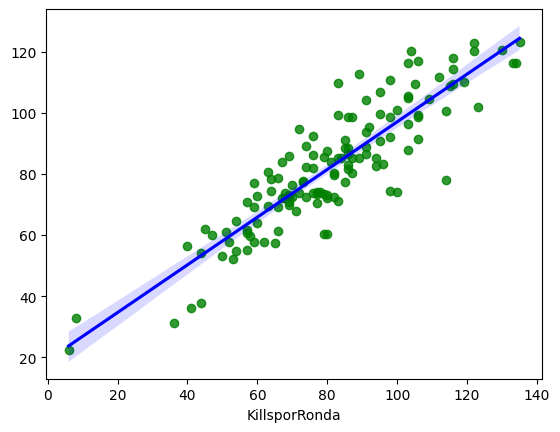

In [ ]:
y_pred2 = forest.predict(x_test)
sns.regplot(x=y_test, y=y_pred2, color='green', line_kws={"color": "blue"})

# FASE 5 evaluation

In [ ]:
#evaluando el modelo de regresion multiple
d = {"true": Y_test, "predicted": Y_pred}
df_lr = pd.DataFrame(data=d)
df_lr["diff"] = df_lr["predicted"]-df_lr["true"]
df_lr

,true,predicted,diff
613,71,79.969776,8.969776
158,91,92.369224,1.369224
633,45,62.858001,17.858001
235,80,81.084023,1.084023
509,76,104.157216,28.157216
...,...,...,...
535,87,87.101746,0.101746
417,44,52.604563,8.604563
465,80,64.865223,-15.134777
211,86,101.122174,15.122174


In [ ]:
from sklearn.metrics import mean_absolute_error
print("coeficiente de determinacion",r2_score(Y_test, Y_pred))
print("MAE es {:.2f}".format(mean_absolute_error(Y_test, Y_pred)))
print("MSE es {:.2f}".format(mean_squared_error(Y_test, Y_pred)))
print("RMSE es",np.sqrt(mean_squared_error(Y_test, Y_pred)))

coeficiente de determinacion 0.6303026951993542
MAE es 11.59
MSE es 200.43
RMSE es 14.15726575534403


In [ ]:
#evaluando el modelo de regresion lineal  analizando las diferencias entre las predicciones del modelo y los valores reales
d = {"true": y_test, "predicted": y_pred}
df_lr = pd.DataFrame(data=d)
df_lr["diff"] = df_lr["predicted"]-df_lr["true"]
df_lr

,true,predicted,diff
613,71,71.628575,0.628575
158,91,97.991829,6.991829
633,45,55.504822,10.504822
235,80,72.755760,-7.244240
509,76,97.122697,21.122697
...,...,...,...
535,87,79.361909,-7.638091
417,44,45.099391,1.099391
465,80,57.152060,-22.847940
211,86,92.896915,6.896915


In [ ]:
from sklearn.metrics import mean_absolute_error
print("coeficiente de determinacion",r2_score(y_test, y_pred))
print("MAE es {:.2f}".format(mean_absolute_error(y_test, y_pred)))
print("MSE es {:.2f}".format(mean_squared_error(y_test, y_pred)))
print("RMSE es",np.sqrt(mean_squared_error(y_test, y_pred)))
# EL MEJOR MODELO ES ESTE EL LINEAL SIMPLE

coeficiente de determinacion 0.7847787583388106
MAE es 8.75
MSE es 116.68
RMSE es 10.801866577159904


In [ ]:
# evaluando el modelo de arbol de decision de regresion
d = {"true": y_test, "predicted": y_pred1}
df_eval = pd.DataFrame(data=d)
df_eval["diff"] = df_eval["predicted"]-df_eval["true"]
df_eval

,true,predicted,diff
613,71,57.0,-14.0
158,91,104.0,13.0
633,45,63.0,18.0
235,80,100.0,20.0
509,76,80.0,4.0
...,...,...,...
535,87,56.0,-31.0
417,44,37.0,-7.0
465,80,56.0,-24.0
211,86,95.0,9.0


In [ ]:
from sklearn.metrics import mean_absolute_error
print("coeficiente de determinacion",r2_score(y_test, y_pred1))
print("MAE es {:.2f}".format(mean_absolute_error(y_test, y_pred1)))
print("MSE es {:.2f}".format(mean_squared_error(y_test, y_pred1)))
print("RMSE es",np.sqrt(mean_squared_error(y_test, y_pred1)))

coeficiente de determinacion 0.6378236633959236
MAE es 10.37
MSE es 196.35
RMSE es 14.01252105328148


In [ ]:
# evaluar el modelo de RANDOMFOREST
d = {"true": y_test, "predicted": y_pred2}
df_eval = pd.DataFrame(data=d)
df_eval["diff"] = df_eval["predicted"]-df_eval["true"]
df_eval

,true,predicted,diff
613,71,67.86,-3.14
158,91,104.27,13.27
633,45,61.93,16.93
235,80,72.21,-7.79
509,76,86.16,10.16
...,...,...,...
535,87,80.34,-6.66
417,44,37.67,-6.33
465,80,60.46,-19.54
211,86,98.63,12.63


In [ ]:
print("coeficiente de determinacion",r2_score(y_test, y_pred2))
print("MAE es {:.2f}".format(mean_absolute_error(y_test, y_pred2)))
print("MSE es {:.2f}".format(mean_squared_error(y_test, y_pred2)))
print("RMSE es",np.sqrt(mean_squared_error(y_test, y_pred2)))

coeficiente de determinacion 0.7863391378810356
MAE es 8.38
MSE es 115.83
RMSE es 10.762637937473059


In [ ]:
terceraprueba = filtrado
terceraprueba

,MatchId,Team,GanarPartida,KillsporRonda,ValorEquipamientoEquipo,TotalDeGranadas,TotaldeRondas
0,4,0.0,0,100,3750,244,23
1,4,1.0,1,50,4400,164,23
2,6,0.0,0,8,25400,4,16
3,6,1.0,1,19,9000,9,16
4,9,0.0,1,101,4100,266,25
...,...,...,...,...,...,...,...
661,509,1.0,1,114,4450,243,27
662,510,0.0,0,122,3550,353,30
663,510,1.0,0,71,4350,273,30
664,511,0.0,0,23,4100,25,5


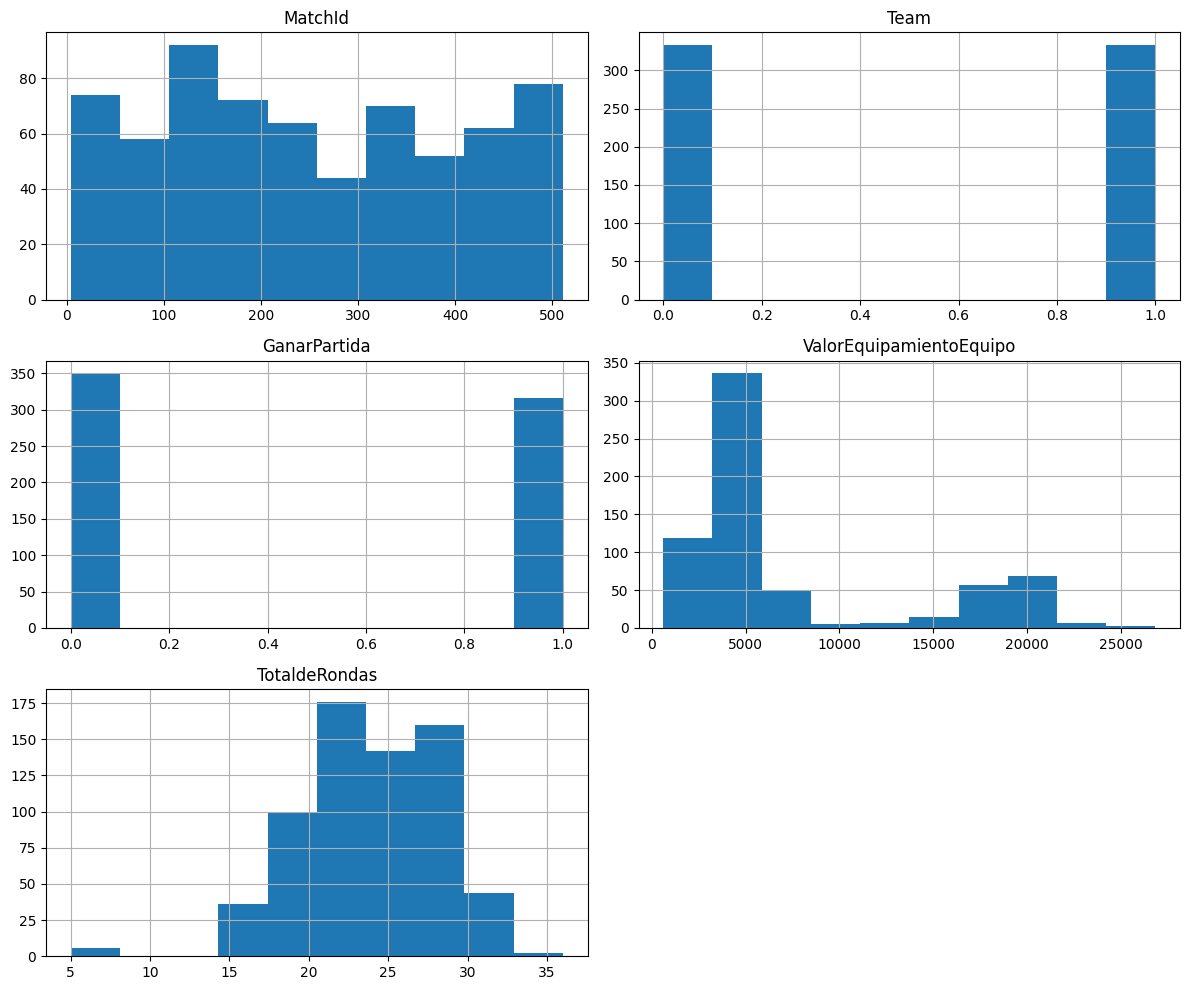

In [ ]:


data_frame_filtrado = terceraprueba.drop(['TotalDeGranadas', 'KillsporRonda'], axis=1)
data_frame_filtrado.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


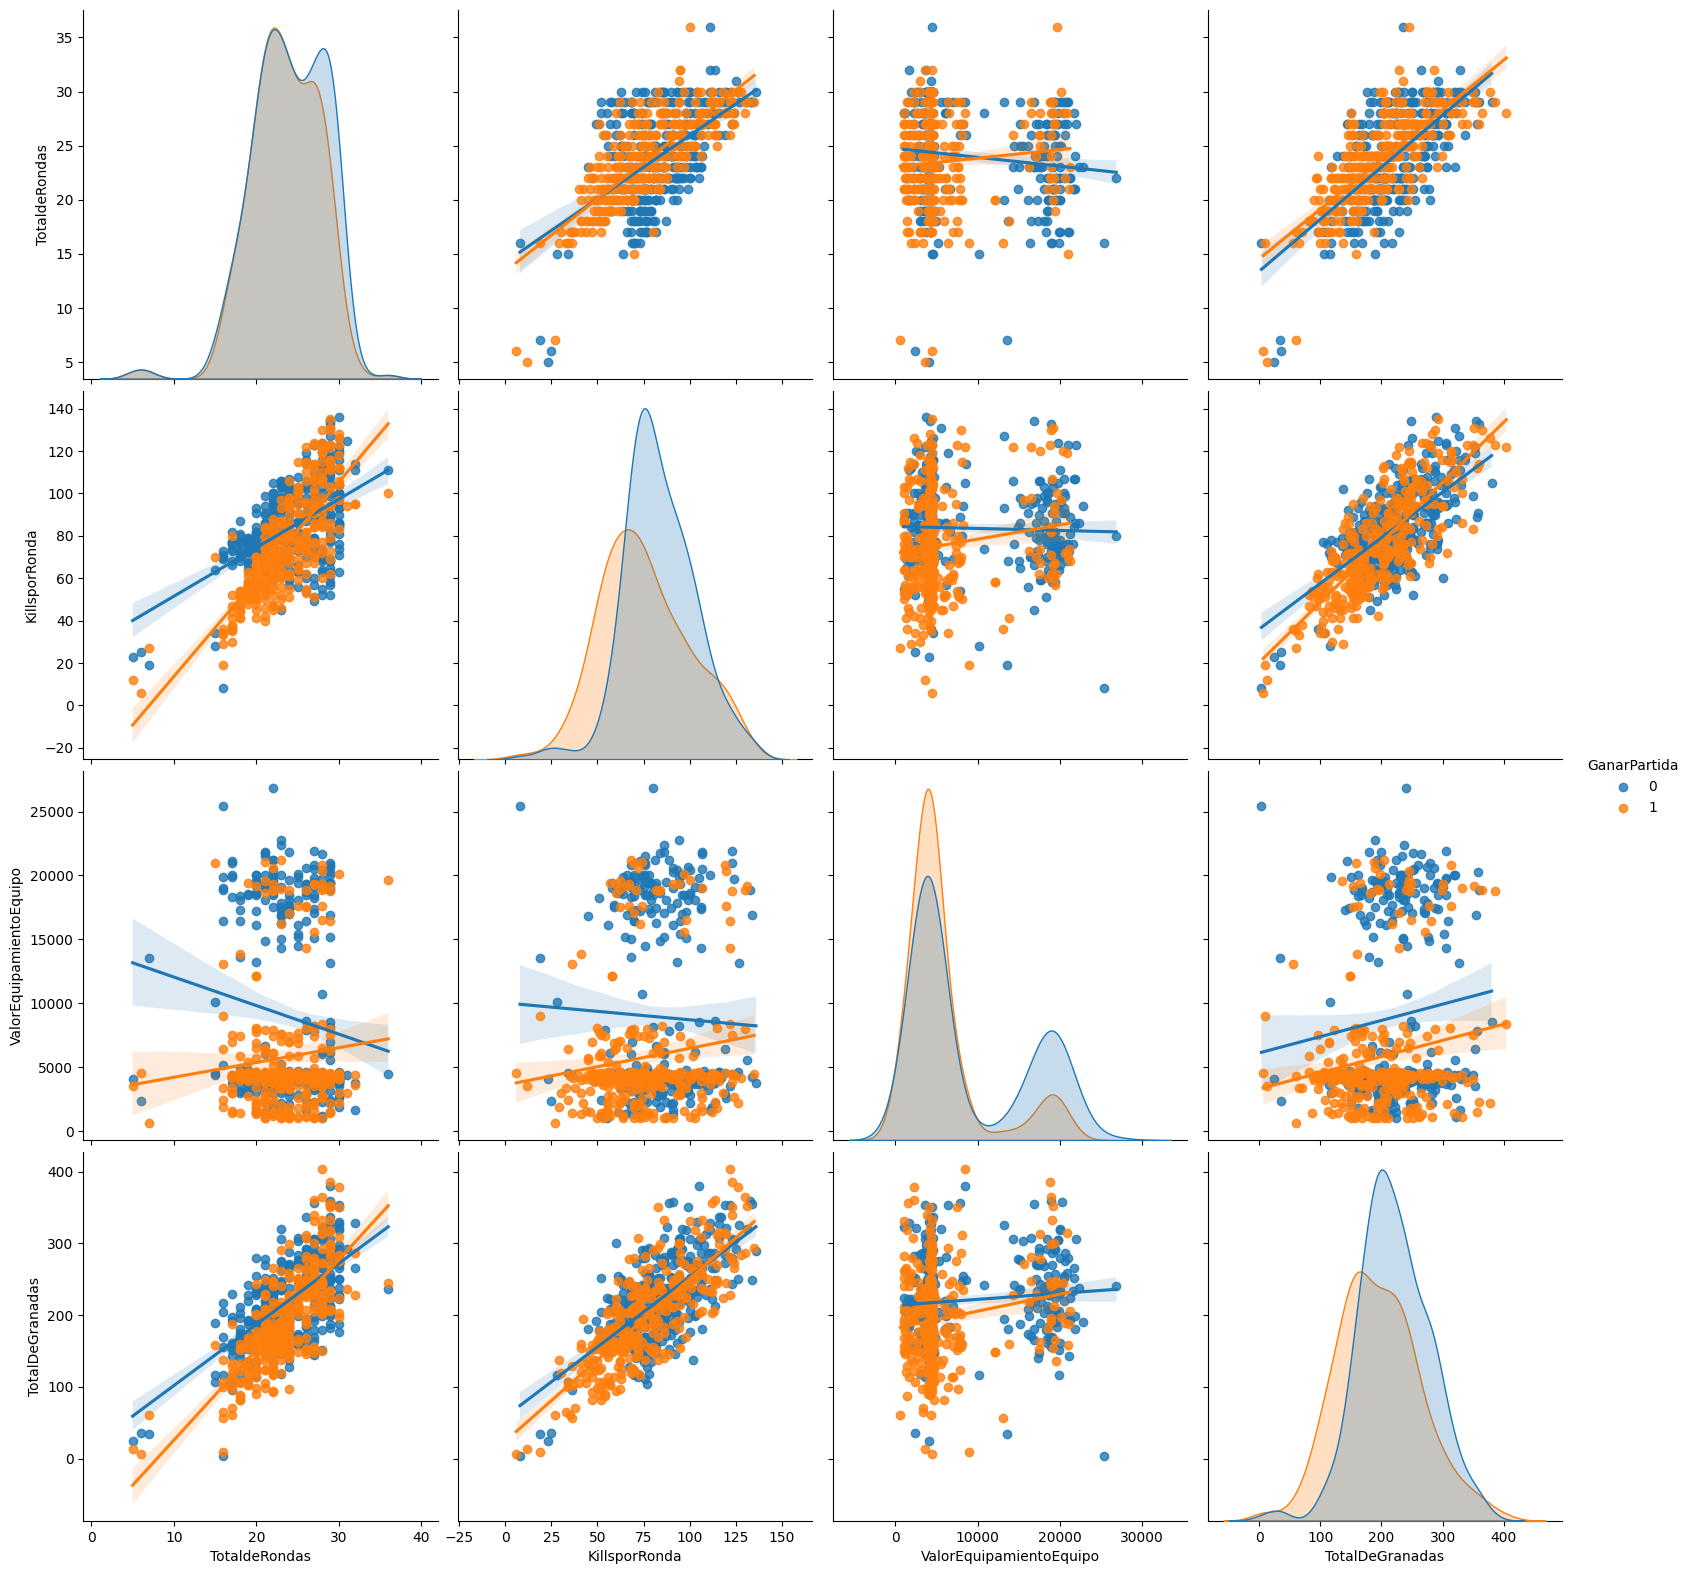

In [ ]:
sns.pairplot(terceraprueba.dropna(), hue='GanarPartida', size=4, vars=['TotaldeRondas','KillsporRonda','ValorEquipamientoEquipo','TotalDeGranadas'], kind='reg')

In [ ]:
#partidas ganadas de los datos filtrados ej killsporRondas aun que no hayan ganado no significa que la victoria sea suya, que tengan mas kills no significa que la victoria sea suya.


In [ ]:
ArbolDC = filtrado[['ValorEquipamientoEquipo','TotaldeRondas', 'KillsporRonda', 'GanarPartida']]
ArbolDC

,ValorEquipamientoEquipo,TotaldeRondas,KillsporRonda,GanarPartida
0,3750,23,100,0
1,4400,23,50,1
2,25400,16,8,0
3,9000,16,19,1
4,4100,25,101,1
...,...,...,...,...
661,4450,27,114,1
662,3550,30,122,0
663,4350,30,71,0
664,4100,5,23,0


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
x = ArbolDC[['ValorEquipamientoEquipo','TotaldeRondas', 'KillsporRonda']]
y = ArbolDC.GanarPartida
#separar los datos de train en entrenamiento y prueba para probar el modelo
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
modelo = DecisionTreeRegressor(max_depth = 4, random_state = 42)
modelo.fit(x_train, y_train)
#validacion del modelo
Y_pred = modelo.predict(x_test)
#evaluacion del modelo
print('precision del modelo en entrenamiento :', modelo.score(x_train, y_train))
print('precision del modelo en validacion :', modelo.score(x_test, y_test))

precision del modelo en entrenamiento : 0.32796586228746116
precision del modelo en validacion : 0.10735760655190574


precision del modelo en entrenamiento : 0.32796586228746116
precision del modelo en validacion : 0.10735760655190574
profundidad del arbol: 4
numero de nodos terminales: 14


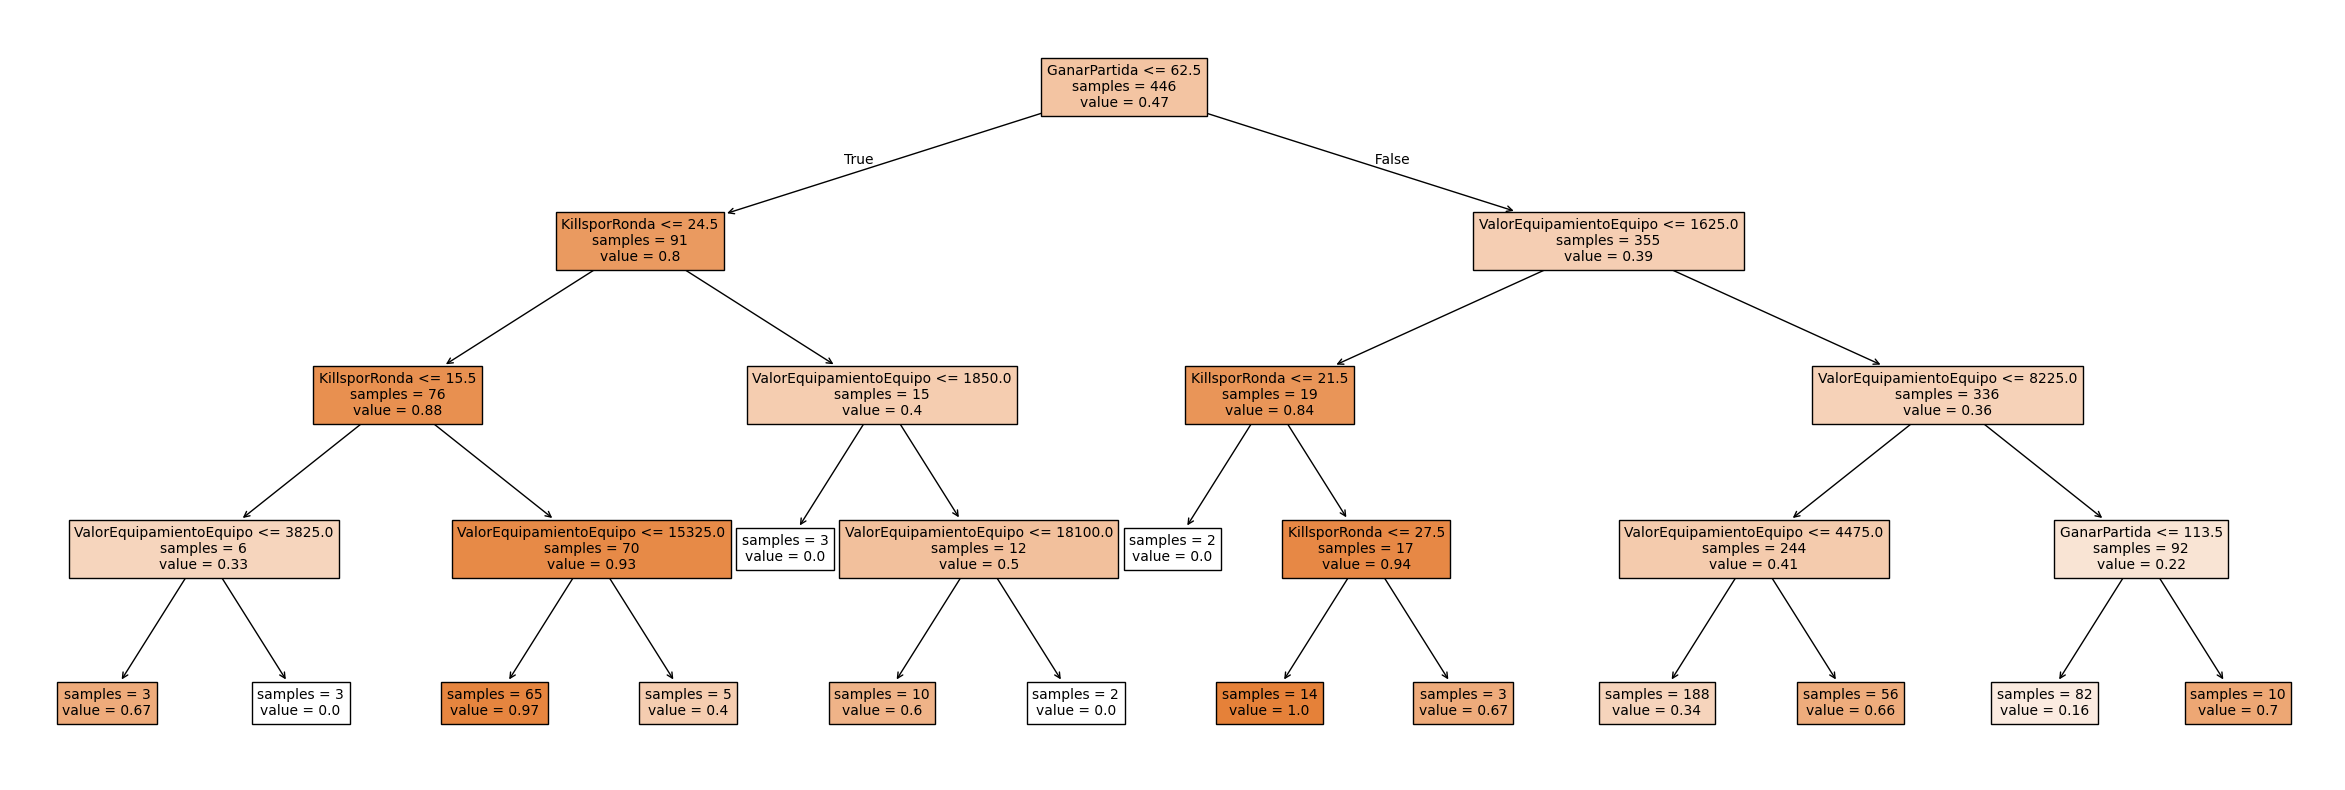

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
#evaluacion del modelo
print('precision del modelo en entrenamiento :', modelo.score(x_train, y_train))
print('precision del modelo en validacion :', modelo.score(x_test, y_test))
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(30, 10))
print(f"profundidad del arbol: {modelo.get_depth()}")
print(f"numero de nodos terminales: {modelo.get_n_leaves()}")
plot = plot_tree(
    decision_tree = modelo,
    feature_names = ArbolDC.drop(columns=["TotaldeRondas"]).columns.tolist(),
    class_names = ["Perdio", "Gano"],
    filled = True,
    impurity= False,
    fontsize = 10,
    precision = 2,
    ax = ax
)
plt.show()


In [ ]:
#este arbol de desicion habla sobre las partidas ganadas por el valordelequipamiento como se observa las que estan
#con menos colores son las que tienen mas probabilidades de que no ganen ya que tiene poco dinero para comprar

In [ ]:
# el árbol ayuda a predecir la probabilidad de ganar la partida según:
#Cuántas kills haces por ronda.
#Cuánto dinero tienes al inicio.
#Cuántas rondas se juegan.

# *predecir* si un jugador sobrevive o no en una ronda de Counter-Strike; Survived.

In [ ]:

import pandas as pd
import numpy as np
from pathlib import Path

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

RANDOM_STATE = 42
DATA_PATH = Path("ET_demo_round_traces_2022.csv")
TARGET_COL = "Survived"

# 1) Cargar y limpiar
df = pd.read_csv(DATA_PATH, delimiter=";")
df = df.drop(columns=[c for c in df.columns if c.startswith("Unnamed")])

df = df[df[TARGET_COL].isin([True, False, 'True', 'False'])]
df[TARGET_COL] = df[TARGET_COL].map({True:1, False:0, 'True':1, 'False':0})

def clean_numeric(series):
    return pd.to_numeric(series.astype(str).str.replace(".", "", regex=False), errors="coerce")

skip_object = ["Map", "Team", "MatchWinner", "RoundWinner"]
for col in df.select_dtypes("object").columns:
    if col not in skip_object + [TARGET_COL]:
        df[col] = clean_numeric(df[col])

df[df.select_dtypes("bool").columns] = df.select_dtypes("bool").astype(int)

y = df[TARGET_COL]
X = df.drop(columns=[TARGET_COL, "MatchWinner", "RoundWinner"])

cat_features = X.select_dtypes("object").columns.tolist()
num_features = X.select_dtypes(exclude="object").columns.tolist()

numeric_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categoric_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocess = ColumnTransformer([
    ("num", numeric_pipe, num_features),
    ("cat", categoric_pipe, cat_features)
])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=RANDOM_STATE
)
print("Datos preparados. Ahora ejecuta las celdas 1-5 según el modelo.")


/tmp/ipython-input-127-3951962376.py:17: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(DATA_PATH, delimiter=";")


Datos preparados. Ahora ejecuta las celdas 1-5 según el modelo.


#LogisticRegression


In [ ]:
from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression(max_iter=1000, random_state=42)

pipe = Pipeline([
    ("prep", preprocess),
    ("clf",  modelo)
])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print("=== Logistic Regression ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("Reporte:\n", classification_report(y_test, y_pred, digits=3))


=== Logistic Regression ===
Accuracy: 0.6774633653360282
Matriz de confusión:
 [[9747 2057]
 [4326 3660]]
Reporte:
               precision    recall  f1-score   support

           0      0.693     0.826     0.753     11804
           1      0.640     0.458     0.534      7986

    accuracy                          0.677     19790
   macro avg      0.666     0.642     0.644     19790
weighted avg      0.671     0.677     0.665     19790



# DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

modelo = DecisionTreeClassifier(random_state=42)

pipe = Pipeline([
    ("prep", preprocess),
    ("clf",  modelo)
])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print("=== Decision Tree ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("Reporte:\n", classification_report(y_test, y_pred, digits=3))


=== Decision Tree ===
Accuracy: 0.6449722081859525
Matriz de confusión:
 [[8168 3636]
 [3390 4596]]
Reporte:
               precision    recall  f1-score   support

           0      0.707     0.692     0.699     11804
           1      0.558     0.576     0.567      7986

    accuracy                          0.645     19790
   macro avg      0.633     0.634     0.633     19790
weighted avg      0.647     0.645     0.646     19790



#RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

modelo = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)

pipe = Pipeline([
    ("prep", preprocess),
    ("clf",  modelo)
])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print("=== Random Forest ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("Reporte:\n", classification_report(y_test, y_pred, digits=3))


=== Random Forest ===
Accuracy: 0.7265790803436079
Matriz de confusión:
 [[9504 2300]
 [3111 4875]]
Reporte:
               precision    recall  f1-score   support

           0      0.753     0.805     0.778     11804
           1      0.679     0.610     0.643      7986

    accuracy                          0.727     19790
   macro avg      0.716     0.708     0.711     19790
weighted avg      0.724     0.727     0.724     19790



#KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

modelo = KNeighborsClassifier(n_neighbors=5)

pipe = Pipeline([
    ("prep", preprocess),
    ("clf",  modelo)
])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print("=== K-Nearest Neighbors ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("Reporte:\n", classification_report(y_test, y_pred, digits=3))


=== K-Nearest Neighbors ===
Accuracy: 0.6531076301162203
Matriz de confusión:
 [[8969 2835]
 [4030 3956]]
Reporte:
               precision    recall  f1-score   support

           0      0.690     0.760     0.723     11804
           1      0.583     0.495     0.535      7986

    accuracy                          0.653     19790
   macro avg      0.636     0.628     0.629     19790
weighted avg      0.647     0.653     0.647     19790



#SVM

In [ ]:
from sklearn.svm import SVC

modelo = SVC(kernel="rbf", probability=True, random_state=42)

pipe = Pipeline([
    ("prep", preprocess),
    ("clf",  modelo)
])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print("=== SVM (RBF Kernel) ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("Reporte:\n", classification_report(y_test, y_pred, digits=3))

# Curva ROC random-forest

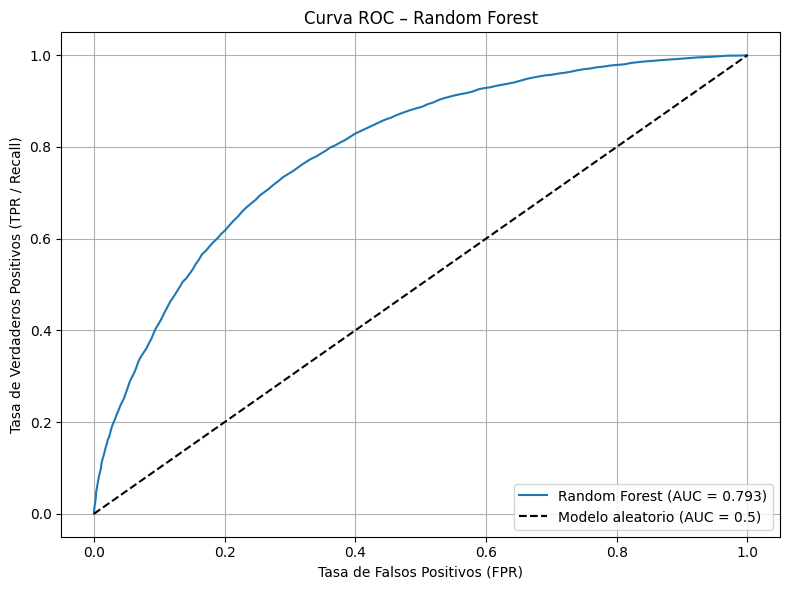

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier


modelo = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)

pipe = Pipeline([
    ("prep", preprocess),
    ("clf", modelo)
])

pipe.fit(X_train, y_train)

# Obtener probabilidades para la clase positiva (Survived = 1)
y_score = pipe.predict_proba(X_test)[:, 1]


fpr, tpr, _ = roc_curve(y_test, y_score)
auc = roc_auc_score(y_test, y_score)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {auc:.3f})")
plt.plot([0, 1], [0, 1], "k--", label="Modelo aleatorio (AUC = 0.5)")
plt.title("Curva ROC – Random Forest")
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR / Recall)")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


# grafico comparacion Acuarcy

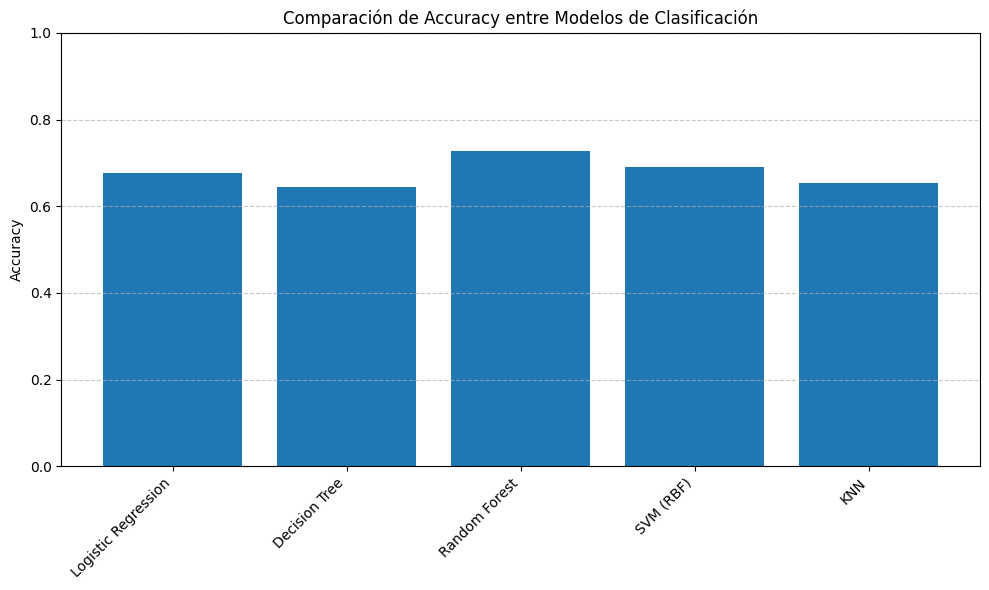

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Datos de accuracy por modelo
data = {
    "Modelo": [
        "Logistic Regression",
        "Decision Tree",
        "Random Forest",
        "SVM (RBF)",
        "KNN"
    ],
    "Accuracy": [
        0.6775,
        0.6450,
        0.7266,
        0.6902,
        0.6531
    ]
}

# Crear DataFrame
df = pd.DataFrame(data)

# Crear gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(df["Modelo"], df["Accuracy"])
plt.ylabel("Accuracy")
plt.title("Comparación de Accuracy entre Modelos de Clasificación")
plt.xticks(rotation=45, ha="right")
plt.ylim(0, 1)  # Rango de 0 a 1 para claridad
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


# Modelo de clasificación la curva ROC-AUC mejorado

/tmp/ipython-input-135-3481001068.py:14: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/ET_demo_round_traces_2022.csv", delimiter=";")


AUC  : 0.801
Acc  : 0.730

              precision    recall  f1-score   support

           0      0.771     0.778     0.774     11804
           1      0.667     0.658     0.663      7986

    accuracy                          0.730     19790
   macro avg      0.719     0.718     0.718     19790
weighted avg      0.729     0.730     0.729     19790



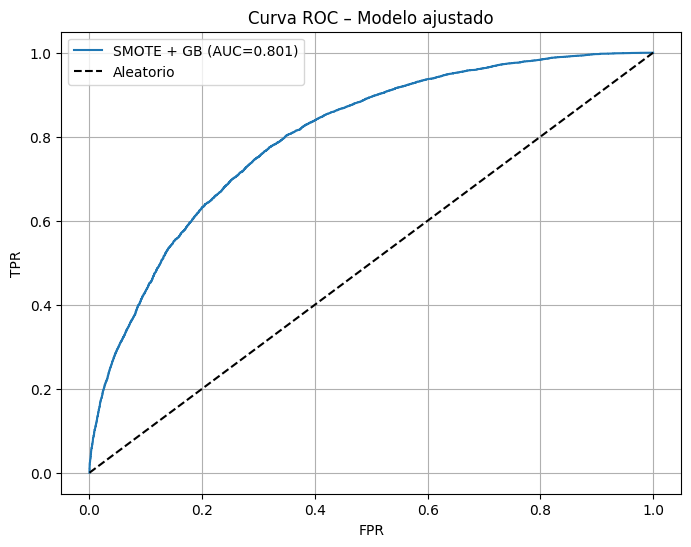

✔️  Modelo guardado en clf_survived_AUC>80.joblib


In [135]:


import pandas as pd, numpy as np, joblib, matplotlib.pyplot as plt
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, classification_report
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# ---------- 1. Cargar y limpiar ----------
df = pd.read_csv("/content/ET_demo_round_traces_2022.csv", delimiter=";")
df = df.drop(columns=[c for c in df.columns if c.startswith("Unnamed")])

df = df[df["Survived"].isin([True, False, 'True', 'False'])]
df["Survived"] = df["Survived"].map({True:1, False:0, 'True':1, 'False':0})

def clean(s):
    return pd.to_numeric(s.astype(str).str.replace(".","",regex=False), errors="coerce")

skip = ["Map","Team","MatchWinner","RoundWinner"]
for col in df.select_dtypes("object").columns:
    if col not in skip+["Survived"]:
        df[col] = clean(df[col])

df[df.select_dtypes("bool").columns] = df.select_dtypes("bool").astype(int)

y = df["Survived"]
X = df.drop(columns=["Survived","MatchWinner","RoundWinner"])

cat_cols = X.select_dtypes("object").columns.tolist()
num_cols = X.select_dtypes(exclude="object").columns.tolist()

num_pipe = Pipeline([
    ("imp", SimpleImputer(strategy="median")),
    ("sc",  StandardScaler())
])
cat_pipe = Pipeline([
    ("imp", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder(handle_unknown="ignore"))
])

prep = ColumnTransformer([
    ("num", num_pipe, num_cols),
    ("cat", cat_pipe, cat_cols)
])

# ---------- 2. Pipeline (prep ➜ SMOTE ➜ modelo) ----------
pipe = ImbPipeline(steps=[
    ("prep", prep),
    ("smote", SMOTE(random_state=42, k_neighbors=5)),
    ("model", GradientBoostingClassifier(
        n_estimators=600,        # ↑ capacidad
        learning_rate=0.04,      # paso moderado
        max_depth=4,             # árboles más profundos
        subsample=0.9,           # regulariza
        random_state=42))
])

# ---------- 3. Train/Test ----------
X_tr, X_te, y_tr, y_te = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=42)

pipe.fit(X_tr, y_tr)

# ---------- 4. Evaluación ----------
y_prob = pipe.predict_proba(X_te)[:,1]
y_pred = (y_prob >= 0.5).astype(int)

auc  = roc_auc_score(y_te, y_prob)
acc  = accuracy_score(y_te, y_pred)

print(f"AUC  : {auc:.3f}")
print(f"Acc  : {acc:.3f}\n")
print(classification_report(y_te, y_pred, digits=3))

# Curva ROC
fpr, tpr, _ = roc_curve(y_te, y_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"SMOTE + GB (AUC={auc:.3f})")
plt.plot([0,1],[0,1],'k--',label="Aleatorio")
plt.xlabel("FPR"); plt.ylabel("TPR"); plt.title("Curva ROC – Modelo ajustado")
plt.legend(); plt.grid(); plt.show()

# ---------- 5. Guardar modelo ----------
joblib.dump(pipe, "/content/clf_survived_AUC>80.joblib")
print("✔️  Modelo guardado en clf_survived_AUC>80.joblib")


In [136]:
import os

# Listar todos los archivos .joblib del entorno actual
joblib_files = [f for f in os.listdir() if f.endswith(".joblib")]
print(joblib_files)


['clf_survived_AUC>80.joblib']


#Modelo de regresion mejorado

In [138]:
# --- 1) Cargar archivo ---
df = pd.read_csv("/content/ET_demo_round_traces_2022.csv", delimiter=";")
df = df.drop(columns=[c for c in df.columns if c.startswith("Unnamed")])

# --- 2) Asegurar que la columna objetivo sea binaria válida ---
TARGET = "Survived"
df = df[df[TARGET].isin([True, False, 'True', 'False', 1, 0])]
df[TARGET] = df[TARGET].map({True: 1, False: 0, 'True': 1, 'False': 0, 1: 1, 0: 0})

# Convertir columnas con valores 'True'/'False' (strings o booleanos) a 1/0
for col in df.columns:
    if df[col].dropna().isin([True, False, 'True', 'False']).all():
        df[col] = df[col].map({True: 1, False: 0, 'True': 1, 'False': 0})


# --- 4) Limpiar columnas numéricas mal formateadas ---
def clean_numeric(series):
    return pd.to_numeric(series.astype(str).str.replace(".", "", regex=False), errors="coerce")

skip_object = ["Map", "Team", "MatchWinner", "RoundWinner"]
for col in df.select_dtypes("object").columns:
    if col not in skip_object + [TARGET]:
        df[col] = clean_numeric(df[col])

# --- 5) Forzar todas las columnas categóricas a tipo string uniforme ---
for col in df.select_dtypes("object").columns:
    df[col] = df[col].astype(str)

# --- 6) Eliminar filas con NaN en la variable objetivo ---
df = df.dropna(subset=[TARGET]).reset_index(drop=True)


/tmp/ipython-input-138-1187602999.py:2: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/ET_demo_round_traces_2022.csv", delimiter=";")


In [139]:
y = df["Survived"]
X = df.drop(columns=["Survived", "MatchWinner", "RoundWinner"])



In [140]:
print(df.columns.tolist())


['Map', 'Team', 'InternalTeamId', 'MatchId', 'RoundId', 'RoundWinner', 'MatchWinner', 'Survived', 'AbnormalMatch', 'TimeAlive', 'TravelledDistance', 'RLethalGrenadesThrown', 'RNonLethalGrenadesThrown', 'PrimaryAssaultRifle', 'PrimarySniperRifle', 'PrimaryHeavy', 'PrimarySMG', 'PrimaryPistol', 'FirstKillTime', 'RoundKills', 'RoundAssists', 'RoundHeadshots', 'RoundFlankKills', 'RoundStartingEquipmentValue', 'TeamStartingEquipmentValue', 'MatchKills', 'MatchFlankKills', 'MatchAssists', 'MatchHeadshots']


In [145]:

import pandas as pd, numpy as np, joblib, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor

# ---------- 1. Cargar CSV ----------
df = pd.read_csv("/content/ET_demo_round_traces_2022.csv", delimiter=";")
df = df.drop(columns=[c for c in df.columns if c.startswith("Unnamed")])

# ---------- 2. Variable objetivo ----------
TARGET = "TeamStartingEquipmentValue"     # dinero inicial del equipo

# ---------- 3. Limpiar columnas ----------
# 3a) Convertir valores booleanos o 'True'/'False' a 1/0
for col in df.columns:
    if df[col].dropna().isin([True, False, 'True', 'False']).all():
        df[col] = df[col].map({True:1, False:0, 'True':1, 'False':0})

# 3b) Convertir strings con puntos (numéricos mal formateados) a float
def clean_num(s):
    return pd.to_numeric(s.astype(str).str.replace(".","",regex=False), errors="coerce")

skip_obj = ["Map", "Team", "RoundWinner", "MatchWinner"]
for col in df.select_dtypes("object").columns:
    if col not in skip_obj:                                   # deja categóricas reales
        df[col] = clean_num(df[col])

# 3c) Forzar todas las columnas categóricas restantes a string puro
for col in df.select_dtypes("object").columns:
    df[col] = df[col].astype(str)

# ---------- 4. Eliminar filas sin target ----------
df = df.dropna(subset=[TARGET]).reset_index(drop=True)

# ---------- 5. Separar X / y ----------
y = df[TARGET].astype(float)
X = df.drop(columns=[TARGET])

cat_cols = X.select_dtypes("object").columns.tolist()
num_cols = X.select_dtypes(exclude="object").columns.tolist()

# ---------- 6. Preprocesamiento ----------
num_pipe = Pipeline([
    ("imp", SimpleImputer(strategy="median")),
    ("sc" , StandardScaler())
])
cat_pipe = Pipeline([
    ("imp", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder(handle_unknown="ignore"))
])
prep = ColumnTransformer([
    ("num", num_pipe, num_cols),
    ("cat", cat_pipe, cat_cols)
])

# ---------- 7. Modelo ----------
reg = GradientBoostingRegressor(
        n_estimators=800,
        learning_rate=0.05,
        max_depth=3,
        subsample=0.9,
        random_state=42)

pipe = Pipeline([
    ("prep", prep),
    ("model", reg)
])

# ---------- 8. Train / Test ----------
X_tr, X_te, y_tr, y_te = train_test_split(
    X, y, test_size=0.25, random_state=42)

pipe.fit(X_tr, y_tr)

# ---------- 9. Evaluación ----------
y_pred = pipe.predict(X_te)
r2  = r2_score(y_te, y_pred)
mae = mean_absolute_error(y_te, y_pred)

print(f"✅ R²  : {r2:.3f}")
print(f"📉 MAE : {mae:,.0f} (dinero)")

# ---------- 10. Guardar modelo ----------
joblib.dump(pipe, "/content/reg_team_equip_R2>80.joblib")
print("Modelo guardado en  reg_team_equip_R2>80.joblib")


/tmp/ipython-input-145-1506494788.py:11: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/ET_demo_round_traces_2022.csv", delimiter=";")


✅ R²  : 0.920
📉 MAE : 1,867 (dinero)
Modelo guardado en  reg_team_equip_R2>80.joblib
